<a href="https://colab.research.google.com/github/Khushil-Modi/SJSU/blob/main/CMPE_258_Assignment_1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent From Scratch on Linear Regression Problem

###Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Linear Regression Class

In [3]:
class LinearReg():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Model training Func.
    def fit(self, x, y):          
        # no_of_training_examples, no_of_features          
        self.m, self.n = x.shape        
        # weight initialization          
        self.w = np.zeros(self.n)          
        self.b = 0          
        self.x = x          
        self.y = y                

        # Gradient Descent
        for i in range(self.iterations):              
            self.update_weights()              
        return self

    # Func. to update weights in GD
    def update_weights(self):            
        y_pred = self.predict(self.x)      
        # calculate gradients        
        dw = - (2 * (self.x.T ).dot(self.y - y_pred)) / self.m       
        db = - 2 * np.sum(self.y - y_pred) / self.m           
        # update weights      
        self.w = self.w - self.learning_rate * dw      
        self.b = self.b - self.learning_rate * db          
        return self
      
    def predict(self, x):      
        return x.dot(self.w) + self.b

### Main Function

Predicted values :  [ 38887.99 124027.95  64042.98]
Real values :  [ 37731. 122391.  57081.]
Trained w :  9675.0
Trained b :  24375.5


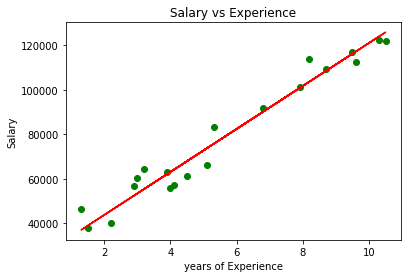

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# Splitting dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 2/3, random_state = 0)
  
# Model training  
model = LinearReg(iterations = 1000, learning_rate = 0.01)
model.fit(x_train, y_train)

# Prediction on test set
y_pred = model.predict(x_test)
print("Predicted values : ", np.round(y_pred[:3], 2)) 
print("Real values : ", y_test[:3])
print("Trained w : ", round(model.w[0], 2))
print("Trained b : ", round(model.b, 2))

# Visualization on test set   
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, y_pred, color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()